In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('fixed.csv')

data.fillna(method='ffill', inplace=True)

label_encoders = {}
categorical_cols = ['State', 'Condition Group', 'Condition', 'Age Group']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop(['COVID-19 Deaths', 'Data As Of', 'Start Date', 'End Date', 'Group', 'ICD10_codes'], axis=1)
y = data['COVID-19 Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Total overlap: {len(set(X_train.index) & set(X_test.index))}")  # Should be 0

C:\Users\saahi\AppData\Local\Temp\ipykernel_13708\2608909285.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Training set size: 496800
Testing set size: 124200
Total overlap: 0


C:\Users\saahi\AppData\Local\Temp\ipykernel_13708\868459408.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)



Training Set Evaluation:
MAE: 42.96
MSE: 761472.83
RMSE: 872.62
R²: 0.8819

Testing Set Evaluation:
MAE: 44.71
MSE: 887720.53
RMSE: 942.19
R²: 0.8391

Feature Importance:
              Feature  Importance
6  Number of Mentions         1.0
0                Year         0.0
1               Month         0.0
2               State         0.0
3     Condition Group         0.0
4           Condition         0.0
5           Age Group         0.0


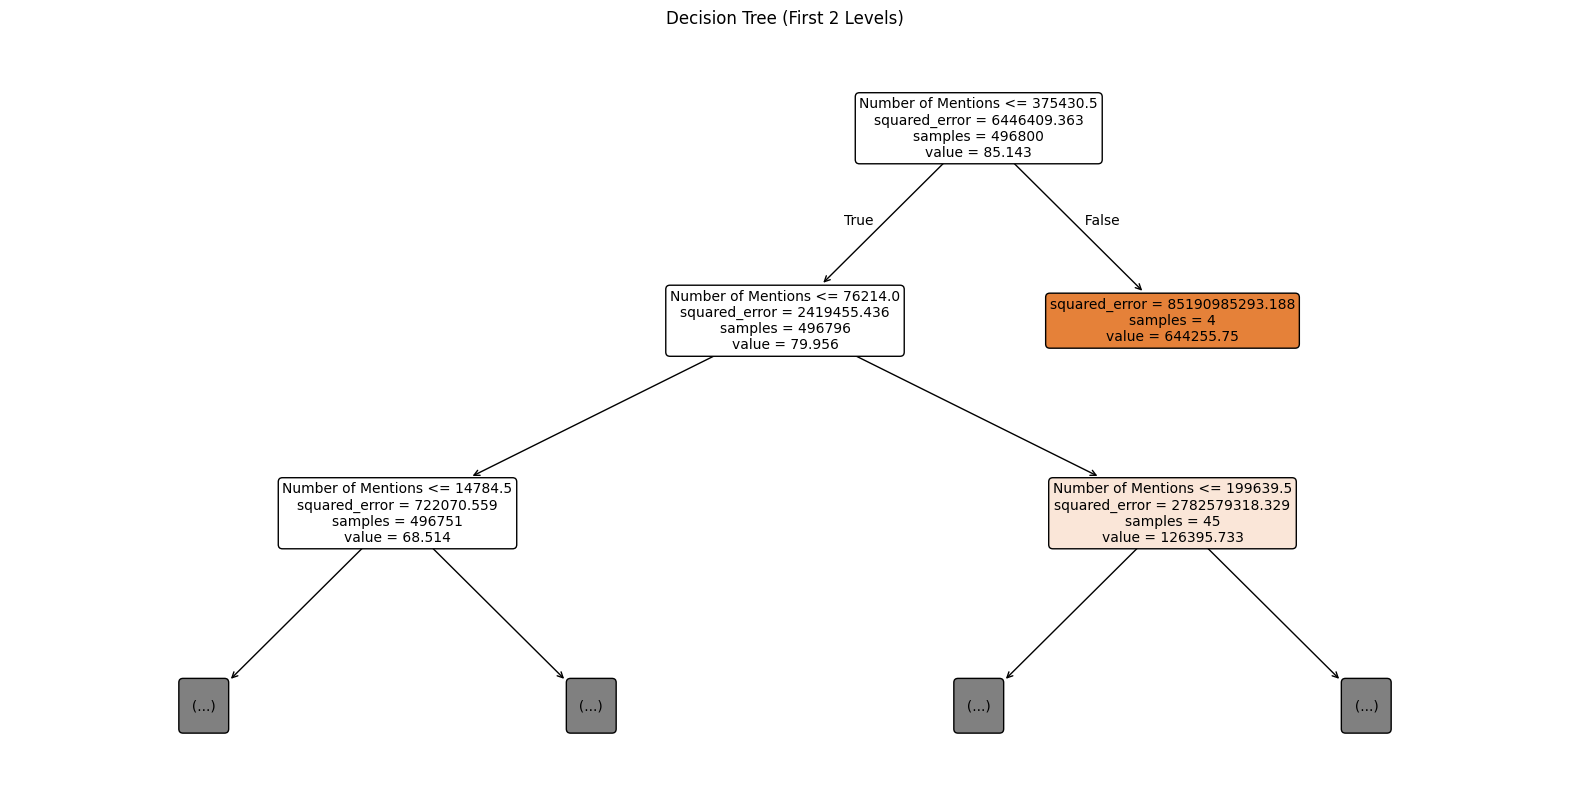

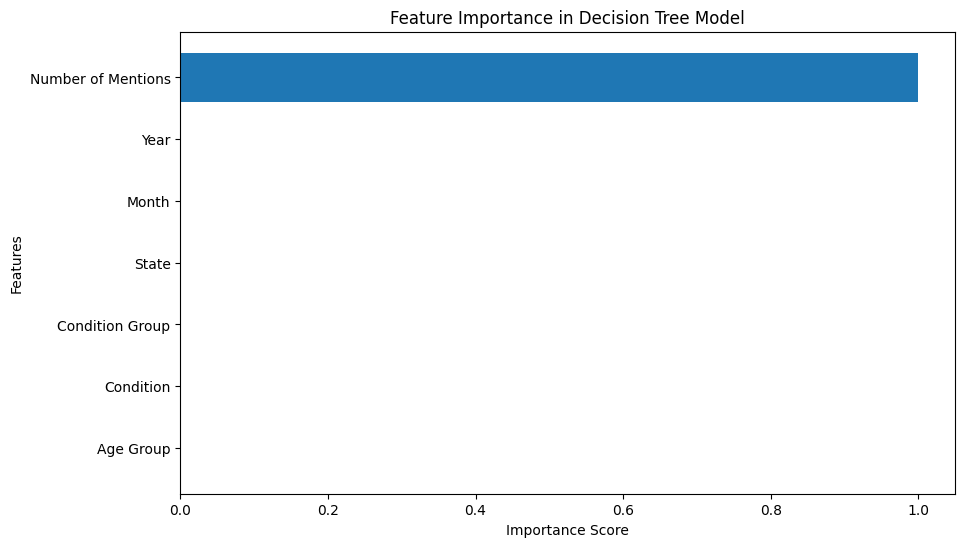

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('fixed.csv')
data.fillna(method='ffill', inplace=True)

label_encoders = {}
categorical_cols = ['State', 'Condition Group', 'Condition', 'Age Group']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop(['COVID-19 Deaths', 'Data As Of', 'Start Date', 'End Date', 'Group', 'ICD10_codes'], axis=1)
y = data['COVID-19 Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

def evaluate_model(y_true, y_pred, set_name):
    print(f"\n{set_name} Set Evaluation:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        rmse = mean_squared_error(y_true, y_pred)**0.5
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Testing")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=2,
    fontsize=10
)
plt.title("Decision Tree (First 2 Levels)")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()


=== Classification Metrics ===

Training Accuracy: 0.9999939613526571
Test Accuracy: 0.9999838969404187

Confusion Matrix (Test Set):
[[124196      1      0]
 [     0      2      0]
 [     0      1      0]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124197
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         1

    accuracy                           1.00    124200
   macro avg       0.50      0.67      0.56    124200
weighted avg       1.00      1.00      1.00    124200



C:\Users\saahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

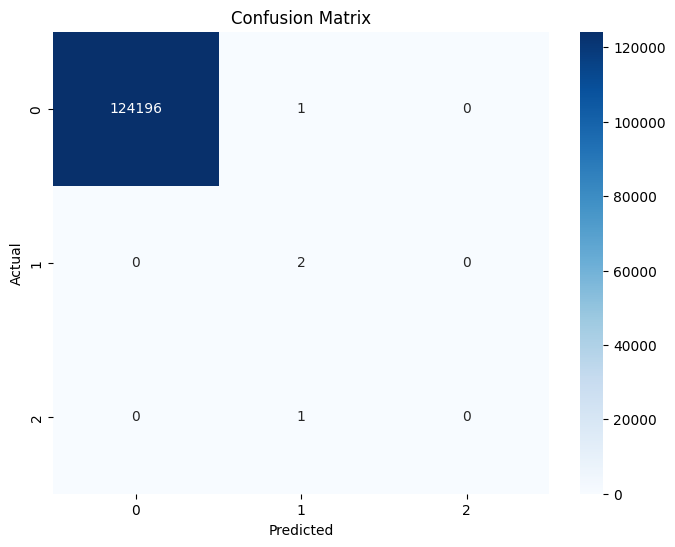

In [ ]:

y_binned = pd.cut(y, bins=5, labels=False)
X_train, X_test, y_train_binned, y_test_binned = train_test_split(X, y_binned, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
dt_classifier.fit(X_train, y_train_binned)

y_train_pred_class = dt_classifier.predict(X_train)
y_test_pred_class = dt_classifier.predict(X_test)

print("\n=== Classification Metrics ===")
print("\nTraining Accuracy:", accuracy_score(y_train_binned, y_train_pred_class))
print("Test Accuracy:", accuracy_score(y_test_binned, y_test_pred_class))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test_binned, y_test_pred_class))

print("\nClassification Report (Test Set):")
print(classification_report(y_test_binned, y_test_pred_class))

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_binned, y_test_pred_class), 
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\saahi\AppData\Local\Temp\ipykernel_13708\836958004.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)



Model Performance Comparison:
         Model        MAE        RMSE       R2
      Original  94.419906  658.255063 0.921486
Condition Only 145.779566 2349.133604 0.000062
State Weighted  96.921083  654.458937 0.922389


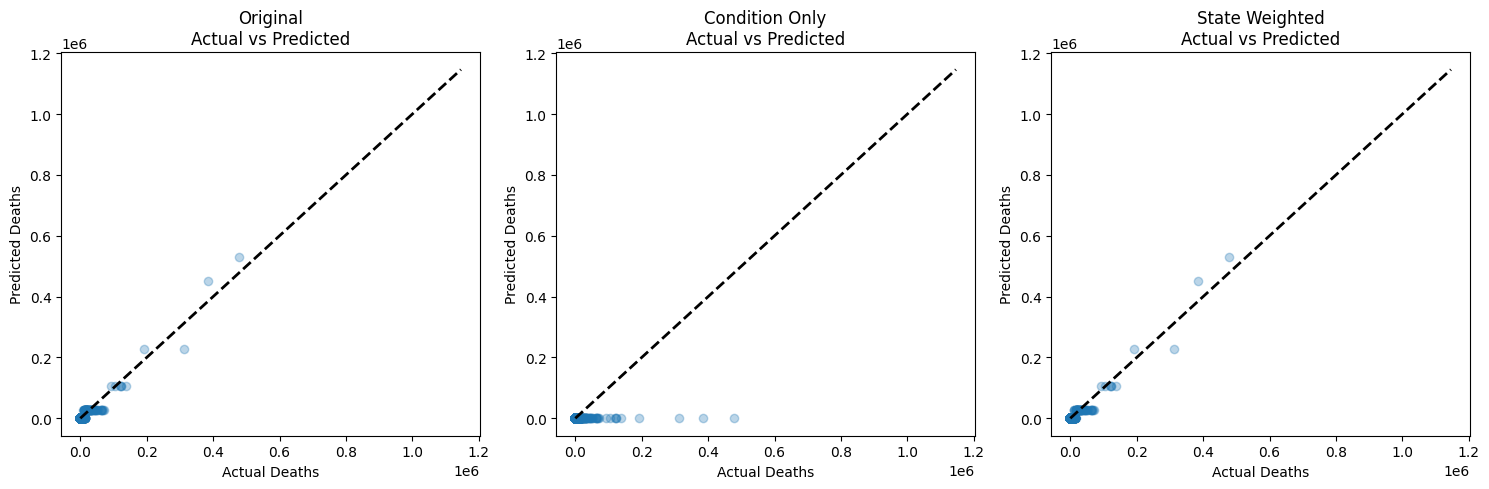

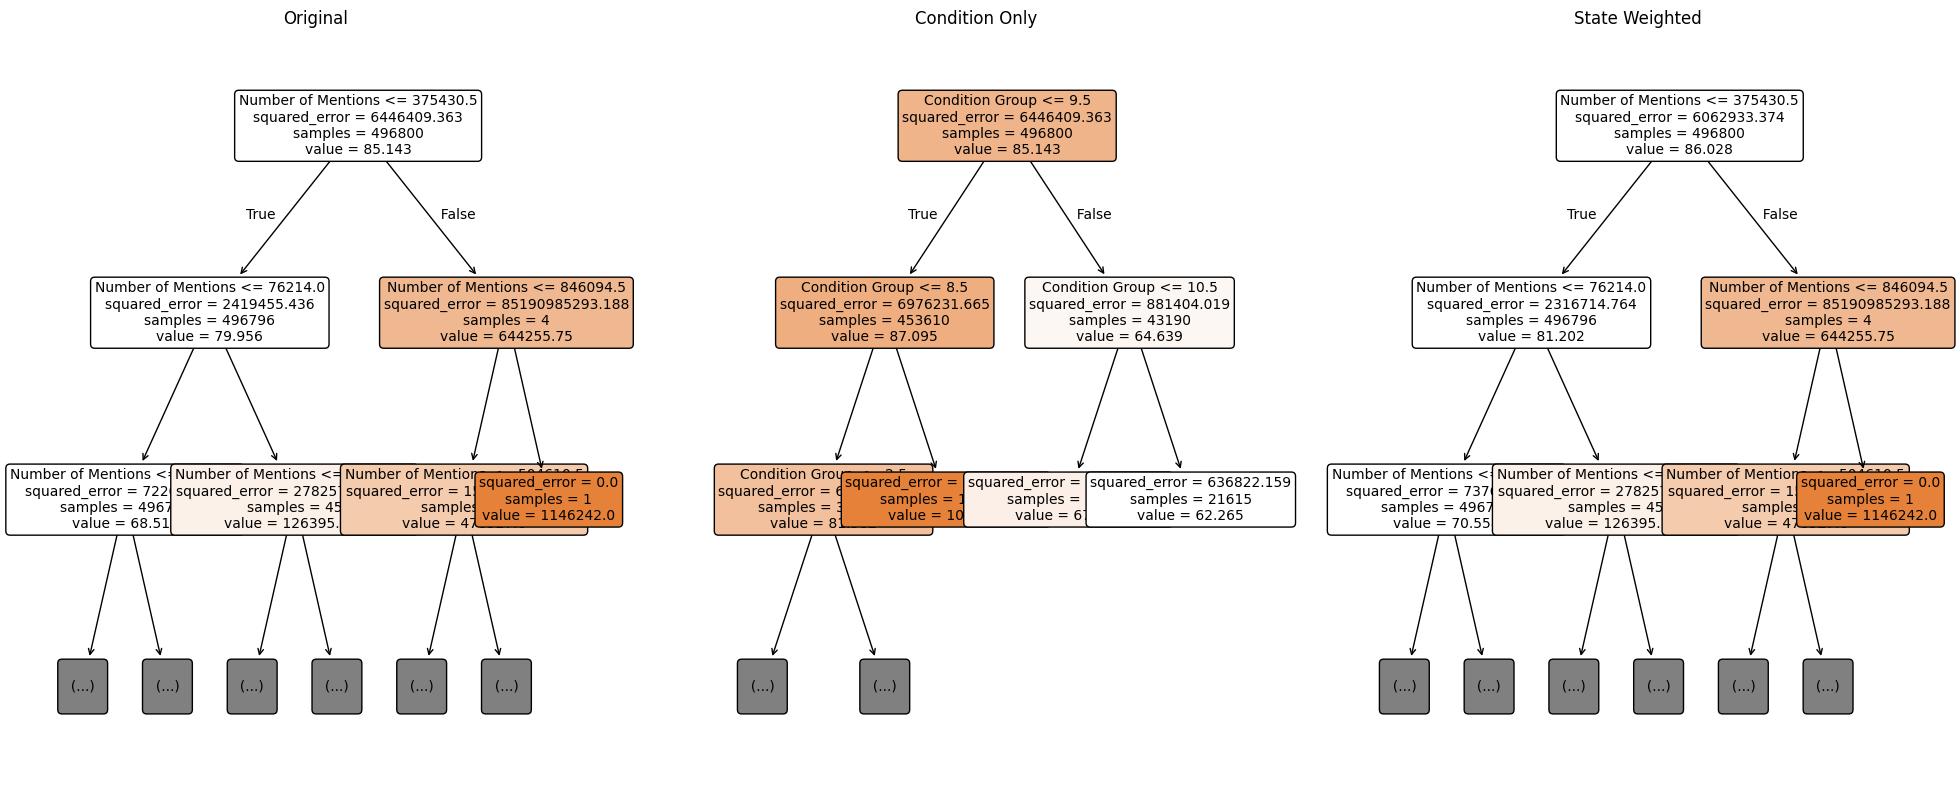


Feature Importance Analysis for Original Model:

Permutation Importance:
           Feature  Importance      Std
Number of Mentions    1.955777 0.000352
              Year    0.000000 0.000000
             Month    0.000000 0.000000
             State    0.000000 0.000000
   Condition Group    0.000000 0.000000
         Condition    0.000000 0.000000
         Age Group    0.000000 0.000000


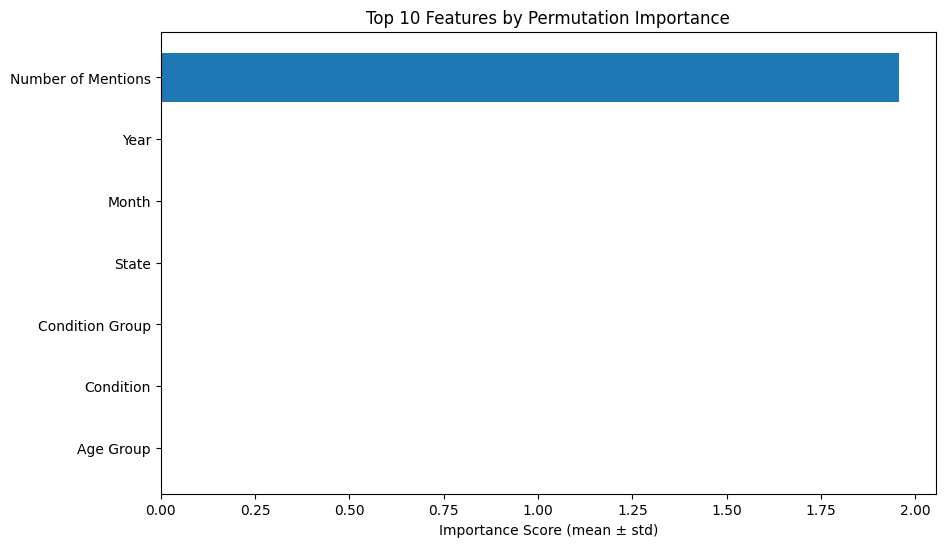

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import (mean_absolute_error, 
                           mean_squared_error, 
                           r2_score)
from sklearn.inspection import permutation_importance
import seaborn as sns

data = pd.read_csv('fixed.csv')
data.fillna(method='ffill', inplace=True)

label_encoders = {}
categorical_cols = ['State', 'Condition Group', 'Condition', 'Age Group']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop(['COVID-19 Deaths', 'Data As Of', 'Start Date', 'End Date', 'Group', 'ICD10_codes'], axis=1)
y = data['COVID-19 Deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_tree_variation(X_train, y_train, variation_type):
    if variation_type == "original":
        model = DecisionTreeRegressor(max_depth=3, random_state=42)
        return model.fit(X_train, y_train), X_test
    
    elif variation_type == "condition_root":
        model = DecisionTreeRegressor(max_depth=3, random_state=42)
        return model.fit(X_train[['Condition Group']], y_train), X_test[['Condition Group']]
    
    elif variation_type == "state_weighted":
        sample_weight = np.where(X_train['State'] == X_train['State'].mode()[0], 5, 1)
        model = DecisionTreeRegressor(max_depth=3, random_state=42)
        return model.fit(X_train, y_train, sample_weight=sample_weight), X_test

models = {
    "Original": train_tree_variation(X_train, y_train, "original"),
    "Condition Only": train_tree_variation(X_train, y_train, "condition_root"),
    "State Weighted": train_tree_variation(X_train, y_train, "state_weighted")
}

results = []
for name, (model, X_test_modified) in models.items():
    y_pred = model.predict(X_test_modified)
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df.to_string(index=False))

plt.figure(figsize=(15, 5))
for i, (name, (model, X_test_modified)) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test_modified)
    
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual Deaths')
    plt.ylabel('Predicted Deaths')
    plt.title(f'{name}\nActual vs Predicted')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 8))
for i, (name, (model, _)) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    if name == "Condition Only":
        plot_tree(model, feature_names=['Condition Group'],
                  filled=True, rounded=True, max_depth=2, fontsize=10)
    else:
        plot_tree(model, feature_names=X.columns,
                  filled=True, rounded=True, max_depth=2, fontsize=10)
    plt.title(name)
plt.tight_layout()
plt.show()

print("\nFeature Importance Analysis for Original Model:")
original_model = models["Original"][0]

perm_importance = permutation_importance(original_model, X_test, y_test, n_repeats=10, random_state=42)
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

print("\nPermutation Importance:")
print(perm_df.head(10).to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(perm_df['Feature'][:10], perm_df['Importance'][:10], xerr=perm_df['Std'][:10])
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Importance Score (mean ± std)')
plt.gca().invert_yaxis()
plt.show()